#DIEGO ANDRÉS DORREGO CARRIL
#MULTIPLE LINEAL REGRESSION 1

This is a project made by me in 2022. It is a simple example about how do a multiple regression in Python.

##PHASE 1: DATASET IMPORTATION

In [1]:
#Import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fundamentos de IA y Machine Learning/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Fundamentos de IA y Machine Learning/data.csv'

##PHASE 2: EXPLORATORY DATA ANALYSIS


Before doing any multivariate analysis, such as a regression model, it is recommended to do an exploratory data analysis to verify if we can indeed carry out a proper analysis with the available data. Preliminary exploratory analysis is crucial as it helps us establish a foundation for decision-making within the analysis process.

First and foremost, it is necessary to have a good understanding of the dataset we are working with. Familiarizing ourselves with the variables and the structure of the data file is essential. This not only aids in obtaining accurate statistical measures, such as identifying missing values, but also enables us to form various hypotheses for our analysis.

Below, we provide essential information about the dataset and its variables, including their type and basic statistical measures (such as measures of central tendency and dispersion). Additional information about each variable is also included to accurately understand the data types and their references. This information has been gathered from Kaggle and web pages related to the subject. However, for some variables, no additional descriptive information could be obtained.

In [ ]:
vivienda_data.info()
#date: Apparently, the date of data collection.
#price (DEPENDENT VARIABLE): Housing price.
#bedrooms: Number of bedrooms in the house.
#sqft_living: According to some sources, the measurement in square feet of the areas where most time is spent in the house.
#sqft_lot: Measurement in square feet of the external land, such as a plot of land.
#sqft_above: Measurement in square feet of the entire living area of a house that is above ground level.
#sqft_basement: Measurement in square feet of the basement area of the house.
#floors: Number of floors in the house.
#waterfront: Binary variable with a boolean appearance (0/1) indicating whether the house is adjacent to a water body (river, lake).
#view: No information available.
#condition: No information available.
#yr_built: Year of construction.
#yr_renovated: Year of renovation.
#street: Street where the house is located.
#city: City where the house is located.
#statezip: State code where the house is located.
#country: Country where the house is located.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float


From the info function applied to the dataset, the following main points can be extracted:

As we can see, most of the variables in the dataset are numeric or ordinal, which is relevant considering that a regression analysis is intended, where variables of this type are necessary.

We also observe that there are no missing values in any of the columns.

At first glance, it is noticeable that variables like bathrooms and floors are of floating-point type instead of being represented as integers, which would be expected for discrete values. However, upon examining the dataset, we can see that in many cases, we have decimal values for the bathrooms variable, such as 1.50 in the first row. It would be necessary to gather more information about these two variables and determine if this type of data makes sense.

The remaining variables are of object type, which, upon inspecting the dataset, we can see mainly corresponds to a string format. We can verify this by calling the dataset to display the first and last rows for each of these variables:

In [ ]:
#We performed an initial visualization of the dataset.
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Next, we proceed to conduct statistical exploration by observing measures of central tendency and dispersion (means and standard deviations) of the variables, as well as the correlations that may exist between them.

In [ ]:
house_data.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


Paying attention to measures of central tendency and dispersion is important to have a clear idea of the variables we are dealing with. One thing that stands out, for example, is the high dispersion of some of the quantitative variables, which may indicate the presence of outliers in the distribution.

We also notice that there are houses with a price of 0. It would be necessary to delve further into the nature of the data itself and determine if it is advisable to make any decisions regarding those values.

For a better visualization of the statistical data for each variable, we can use the pyplot module from the matplotlib library to visually represent the distribution of the variables:

In [ ]:
#Import Matplotlib and Seaborn, two of the most important data visualization libraries in Python
import matplotlib.pyplot as plp
import seaborn as sns

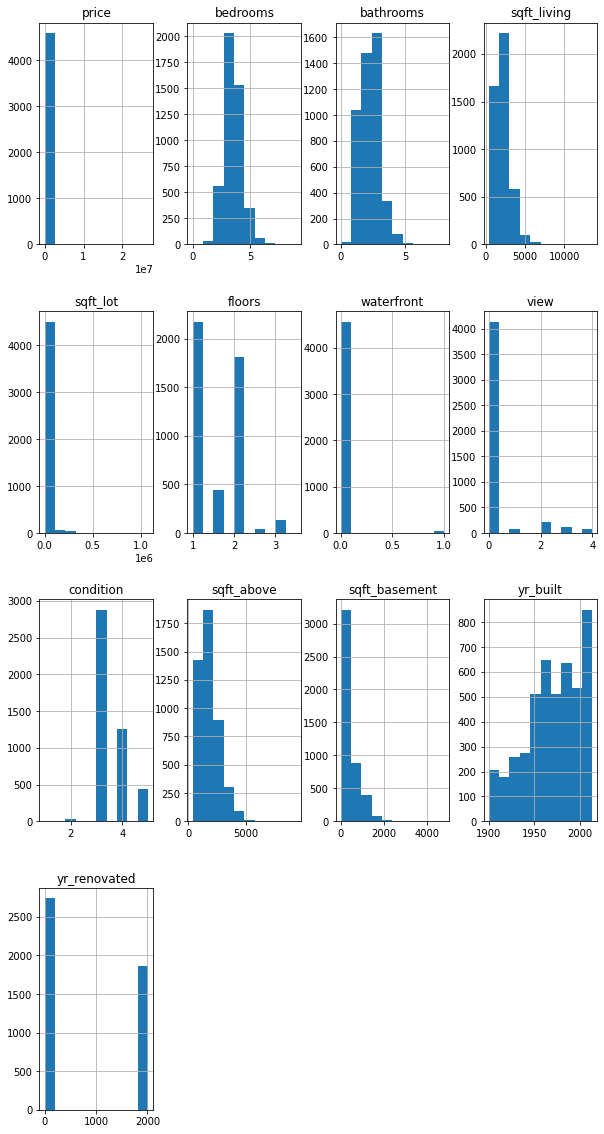

In [ ]:
house_data.hist(figsize=(10,20))
plp.show()

Next, we will proceed to perform a correlation analysis among the variables in the dataset. This process is of utmost importance as it provides information on how to construct our model. It is not useful, for example, to include all variables in a regression model if most of them show no correlation with the dependent variable. We need to observe the relevance of including each variable by examining its correlation with the variable to be predicted.

It is also important to observe correlation pairs among independent variables. This is crucial to verify if certain basic assumptions in regression analysis, such as multicollinearity, are met. If some variables are highly correlated, it can negatively impact the regression model's results, and it may be necessary to remove some variables from the model. Additionally, the detection of highly correlated variables may be sufficient for dimensionality reduction, which would enhance the efficiency of our analysis.

To accomplish this, we will obtain a correlation matrix that provides precise information about the correlation between each variable

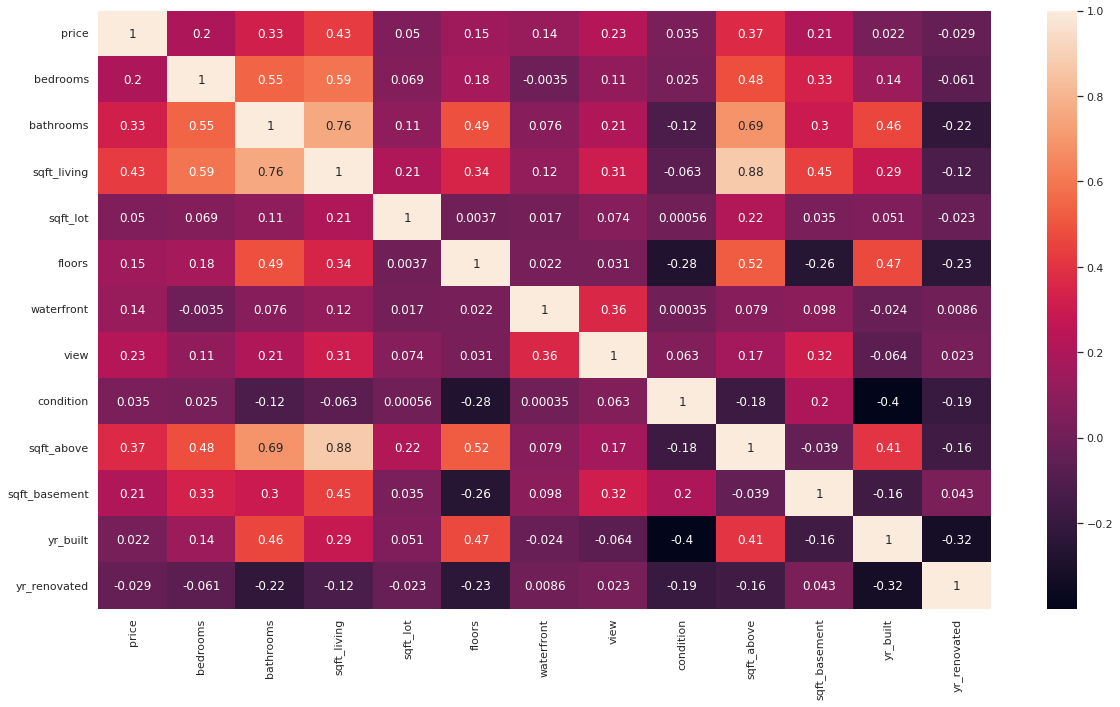

In [ ]:
corr = house_data.corr()
sns.heatmap(corr, annot=True)
sns.set(rc = {'figure.figsize':(20,11)})


We observe that there is a correlation between the housing price and variables such as sqtf_above, sqtf_living, and bathrooms. Other variables show some correlation with the housing price, but it is weaker, not exceeding a value of 0.23. Examples include sqtf_basement, view, waterfront, floors, and bedrooms. Regarding the remaining variables, the correlation with the target variable is almost non-existent, so they should not be included in the model.

Regarding multicollinearity, we see that there are possible highly correlated independent variables, such as sqtf_living and sqtf_above, with a correlation measure of 0.88. We also observe that sqtf_above, sqtf_living, bedrooms, and bathrooms generate pairs with high correlation measures. We also notice, although to a lesser extent, the correlation between the variable floors and others such as bathrooms or sqtf_above. This can be a problem as it may negatively impact the model. Since it is a small dataset, the idea of removing one of the variables is not initially considered, but it could be an option to consider in other contexts.

###The special case of qualitative variables.


In regression models, the predictor variables must be quantitative. Therefore, if we have qualitative variables that could be potential predictors, we need to convert them into dummy variables, i.e., quantifying them. This process is straightforward using the pandas library, but the complexity lies in determining which variables to transform, as different cases may not favor the analysis.

One of those cases is the multiplicity of values in a qualitative variable. Some variables may have a large number of distinct values. This would result in Python creating an equally large number of dummy variables.

In the case at hand, this occurs with the street and statezip variables. If we were to generate dummy variables based on these two qualitative variables, along with the rest (excluding the date variable), we would end up with a dataset of approximately 4661 columns.

In [ ]:
dum_columns = ['statezip', 'street', 'country', 'city']
house_data_dummies = pd.get_dummies(data = house_data, prefix = 'DUM',
                                       prefix_sep='_',
                                       columns = dum_columns,
                                       drop_first=False,
                                       dtype = 'int8')
house_data_dummies.shape

(4600, 4661)

This large number of columns complicates the regression analysis further. The solution would be to either recode the variables in the dataset by reducing the values—for example, grouping the streets based on some characteristic that allows for clustering—or to perform dimensionality reduction using statistical tools like PCA.

In the case at hand, in order to align more closely with the course curriculum, it has been decided to exclude the street and statezip variables. It can be considered that the country and city variables provide similar information. However, if the regression model does not improve, their inclusion can be reconsidered.

By creating dummy variables from the country and city variables, we obtain a dataset with 61 columns, which is much simpler to handle analytically.

In [ ]:
dum_columns = ['country', 'city']
house_data_dummies = pd.get_dummies(data = house_data, prefix = 'DUM',
                                       prefix_sep='_',
                                       columns = dum_columns,
                                       drop_first=False,
                                       dtype = 'int8')
house_data_dummies.shape

(4600, 61)

In [ ]:
house_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4600 non-null   object 
 1   price                    4600 non-null   float64
 2   bedrooms                 4600 non-null   float64
 3   bathrooms                4600 non-null   float64
 4   sqft_living              4600 non-null   int64  
 5   sqft_lot                 4600 non-null   int64  
 6   floors                   4600 non-null   float64
 7   waterfront               4600 non-null   int64  
 8   view                     4600 non-null   int64  
 9   condition                4600 non-null   int64  
 10  sqft_above               4600 non-null   int64  
 11  sqft_basement            4600 non-null   int64  
 12  yr_built                 4600 non-null   int64  
 13  yr_renovated             4600 non-null   int64  
 14  street                  

### Most relevant correlations between the dependent variable price and the quantitative variables

Once we have obtained the statistical measure indicating the correlation between variables, data visualization becomes an excellent complement for a better understanding of the nature of that relationship.

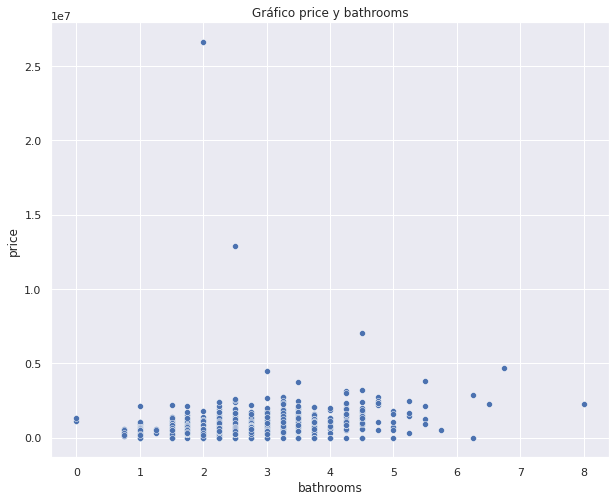

In [ ]:
plp.figure(figsize = (10,8))
plp.title("price y bathrooms")
sns.scatterplot(x='bathrooms', y='price', data=house_data, palette='viridis')
plp.grid(linewidth = 1)



What we can observe from the above is the presence of outliers in the price variable. Typically, other types of graphical representations such as box plots are used to identify outliers. However, in this case, we can clearly see the presence of at least 3 outliers in the price variable with a simple scatter plot. The subsequent graphs also show the same outlier data.

Given this circumstance, it may be worth considering how to handle the outliers, especially if using MSE as a metric. However, at first glance and considering the volume of the data, it does not appear that the outliers will pose a problem for the proper functioning of the proposed regression models.

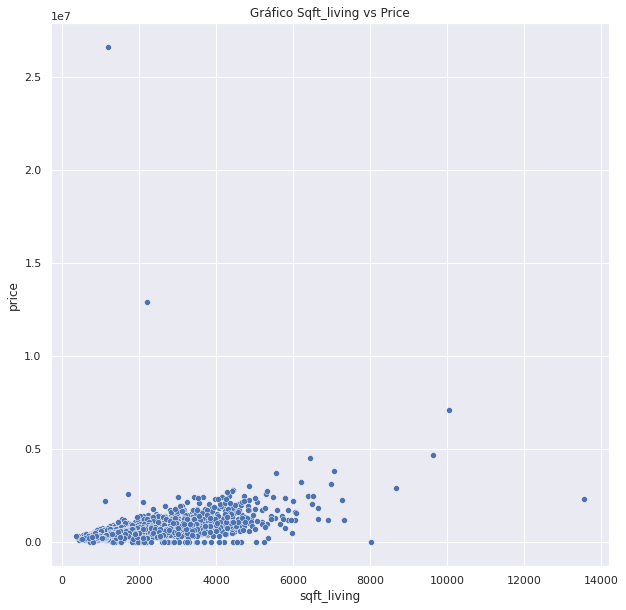

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Sqft_living vs Price")
sns.scatterplot(x='sqft_living', y='price', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

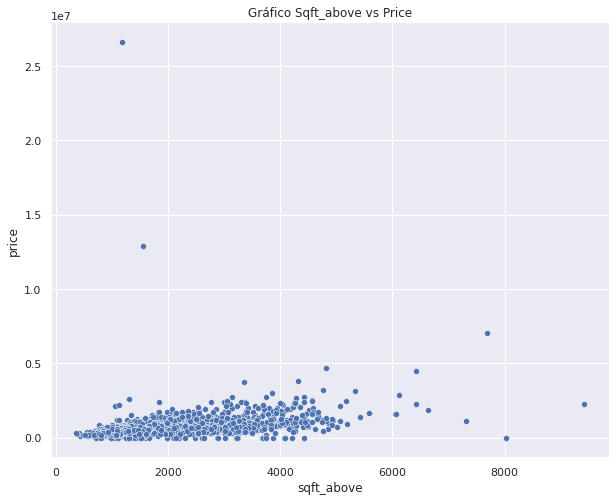

In [ ]:
plp.figure(figsize = (10,8))
plp.title("Sqft_above vs Price")
sns.scatterplot(x='sqft_above', y='price', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

###In search of multicollinearity: Most relevant correlations among potential independent variables.

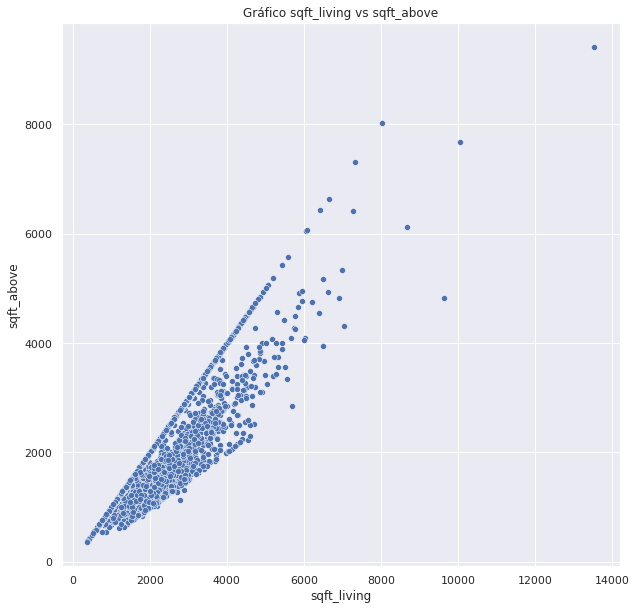

In [ ]:
plp.figure(figsize = (10,10))
plp.title("sqft_living vs sqft_above")
sns.scatterplot(x='sqft_living', y='sqft_above', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

As observed in the previous graph, the variables sqft_living and sqft_above are closely related, as confirmed by the correlation matrix with a value of 0.88. This could be a problem when trying to obtain a good regression model, and it may be worth considering the option of removing one of these variables to build better regression models.

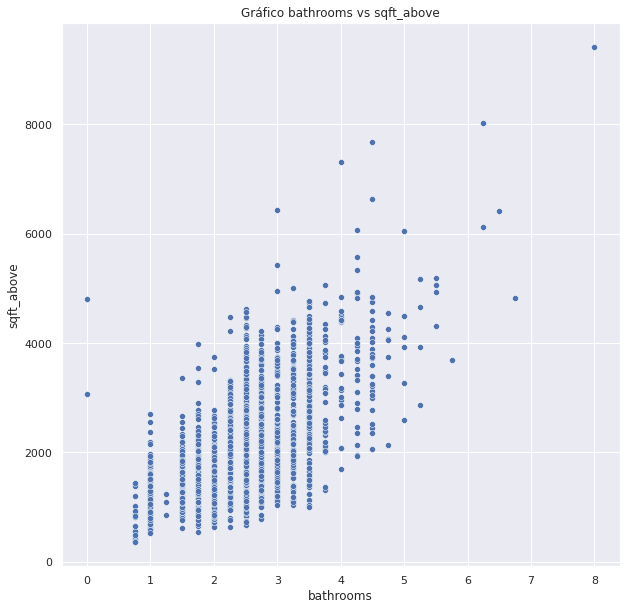

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Bathrooms vs sqft_above")
sns.scatterplot(x='bathrooms', y='sqft_above', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

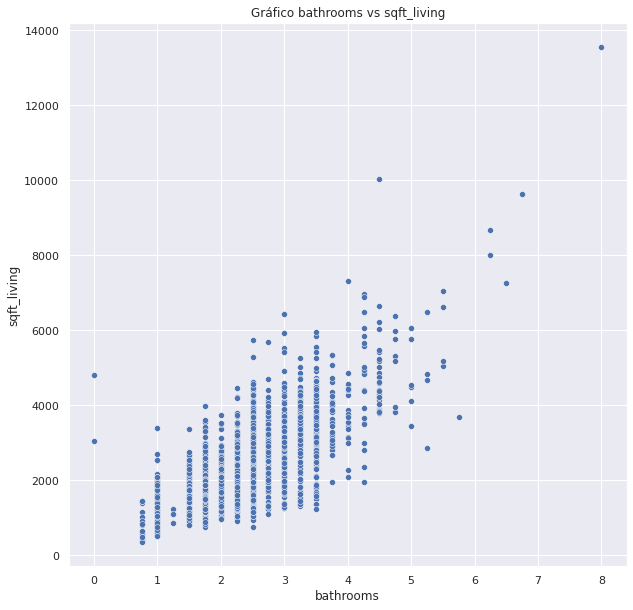

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Bathrooms vs sqft_living")
sns.scatterplot(x='bathrooms', y='sqft_living', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

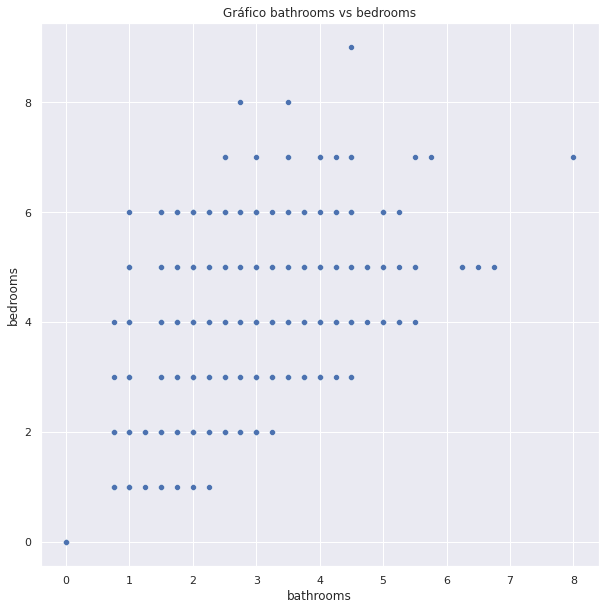

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Bathrooms vs bedrooms")
sns.scatterplot(x='bathrooms', y='bedrooms', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

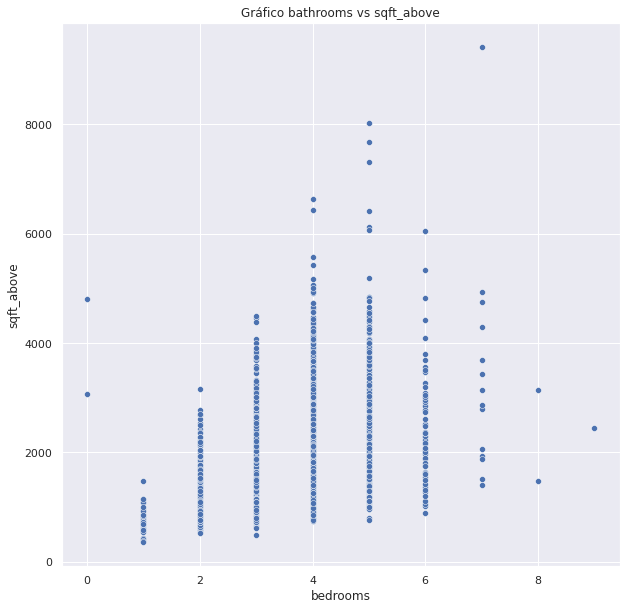

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Bathrooms vs sqft_above")
sns.scatterplot(x='bedrooms', y='sqft_above', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

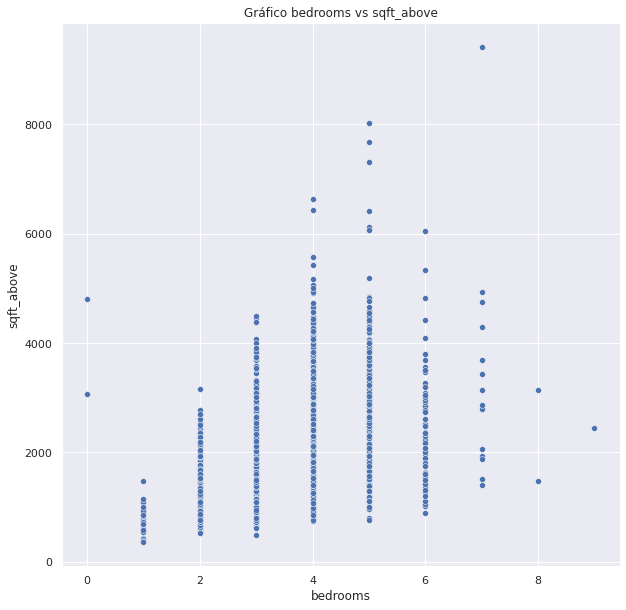

In [ ]:
plp.figure(figsize = (10,10))
plp.title("Bedrooms vs sqft_above")
sns.scatterplot(x='bedrooms', y='sqft_above', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

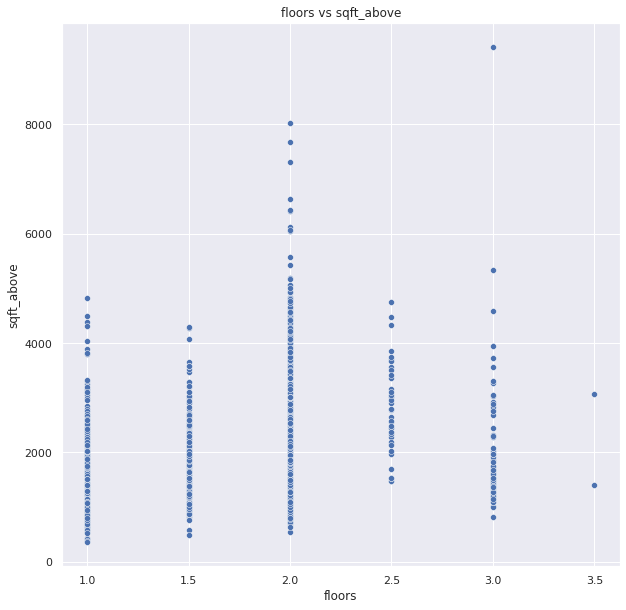

In [ ]:
plp.figure(figsize = (10,10))
plp.title("floors vs sqft_above")
sns.scatterplot(x='floors', y='sqft_above', data = house_data, palette='viridis')
plp.grid(linewidth = 1)

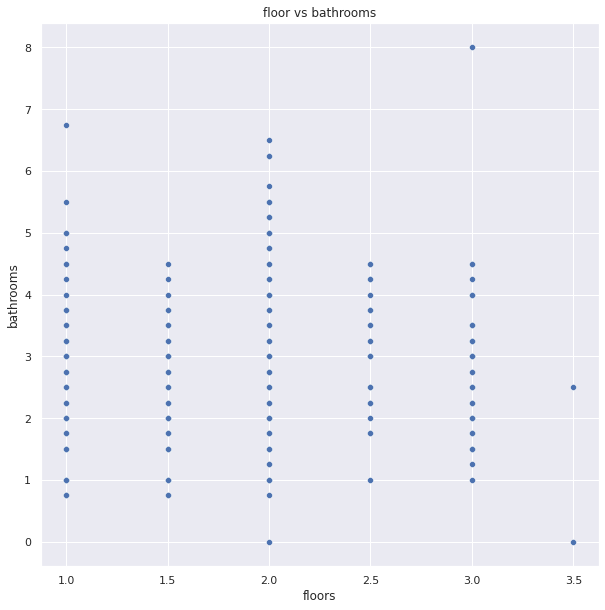

In [ ]:
plp.figure(figsize = (10,10))
plp.title("floor vs bathrooms")
sns.scatterplot(x='floors', y='bathrooms', data=house_data, palette='viridis')
plp.grid(linewidth = 1)

##FASE 3: TRAINING AND VALIDATION


Once the dataset has been explored, we move on to the next phase, where we begin to formulate hypotheses to guide our regression model. As hypotheses are formulated, we continuously evaluate and analyze the results we found.

###H1: Inclusion of all quantitative variables.


In this first hypothesis, we will only use all the quantitative variables. This is an initial hypothesis, considering that the model only accepts quantitative variables. It makes sense to start with this hypothesis given the high correlation measures between quantitative variables.

In [ ]:
#We delete qualitative variables in a new dataset
cat_columns = ['date', 'street', 'country', 'statezip', 'city', 'waterfront']
house_data_h1 = vivienda_data.drop(cat_columns, axis = 1)

In [ ]:
#Lets check the dataset
house_data_h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992



Next, we prepare a portion of the data for training the algorithm, and another portion for validation.

In [ ]:
#Independent variables
x_h1 = house_data_h1.drop(['price'], axis = 1)
#Dependent variable / target
y_h1 = house_data_h1['price']

In [ ]:
#Prepare training data and test data
from sklearn.model_selection import train_test_split
x_h1_train, x_h1_test, y_h1_train, y_h1_test = train_test_split(x_h1, y_h1,
                                                                test_size=0.20, random_state=43)

In [ ]:
#Lets fo the lineal regression
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h1_train, y_h1_train)


LinearRegression()

###Validation of H1

Next, we will proceed to check if Hypothesis 1 provides a good multiple regression model. To do this, we need to choose a metric to assess the validity of the hypothesis. In this case, the mean squared error (MSE) has been chosen, where lower values indicate better performance, with values closer to 0 being considered good.

In [ ]:
#(MSE)
from sklearn.metrics import mean_squared_error

In [ ]:
pred_training = regresion_lineal.predict(x_h1_train)


mse_h1_train = mean_squared_error(y_true=y_h1_train, y_pred=pred_training)
print('MSE train_h1 = ' + str (mse_h1_train))


pred_training = regresion_lineal.predict(x_h1_test)

#Calculate the MSE
mse_h1_test = mean_squared_error(y_true=y_h1_test, y_pred=pred_training)
print('MSE test_h1 = ' + str (mse_h1_test))

Error cuadrático medio (MSE) train_h1 = 292750686120.55225
Error cuadrático medio (MSE) test_h1 = 77024042623.3266



As we can see, the MSE has a value that is far from 0, indicating that this hypothesis provides very poor results, and it should be discarded/modified. Such a result indicates that the regression model is unable to fit the input data properly, and therefore, it will lack predictive ability.

###H2: Inclusion of quantitative and qualitative variables.

Upon observing that the model with quantitative variables did not perform well, in this hypothesis, we will include the qualitative variables that were left out in the first hypothesis to check if the model improves.

In [ ]:
x_h2 = house_data_dummies.drop(['price','street','statezip','date'], axis = 1)
y_h2 = house_data_dummies['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_h2_train, x_h2_test, y_h2_train, y_h2_test = train_test_split(x_h2, y_h2,
                                                                test_size=0.20, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h2_train, y_h2_train)


LinearRegression()

###Validation of H2

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_training_h2 = regresion_lineal.predict(x_h2_train)
mse_h2_train = mean_squared_error(y_true=y_h2_train, y_pred=pred_training_h2)
print('(MSE) train_h2 = ' + str (mse_h2_train))

pred_training_h2 = regresion_lineal.predict(x_h2_test)
mse_h2_test = mean_squared_error(y_true=y_h2_test, y_pred=pred_traning_h2)
print('(MSE) test_h2 = ' + str (mse_h2_test))

print('(MSE) test_h1 = ' + str (mse_h1_test))
print('(MSE) train_h1 = ' + str (mse_h1_train))


Error cuadrático medio (MSE) train_h2 = 277018243131.4765
Error cuadrático medio (MSE) test_h2 = 59681723073.72418
Error cuadrático medio (MSE) test_h1 = 77024042623.3266
Error cuadrático medio (MSE) train_h1 = 292750686120.55225


The model has improved, but we are still far from having a model that can provide accurate predictive analysis. Let's move on to the third hypothesis:

###H3: Normalization of the dependent variable using StandardScaler.

Based on the improvement observed by including the qualitative variables, we will proceed with the next hypotheses using this new dataset with dummy variables. We should formulate new hypotheses considering the previous improvements.

In this case, we will normalize the dependent variable, which is a commonly used technique in statistical analysis when a variable has a wide range. In our case, we noticed that the dependent variable had outliers and a high dispersion, which indicates that standardization might be necessary.

In [ ]:
x_h3 = house_data_dummies.drop(['price','street','statezip','date'], axis = 1)
y_h3 = house_data_dummies['price']

In [ ]:
# Scale the price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Lets do the transformations with numph
y_h3 = scaler.fit_transform(y_h3.to_numpy().reshape(-1,1))
y_h3 = y_h3.reshape(1,-1)[0]

In [ ]:
from sklearn.model_selection import train_test_split
x_h3_train, x_h3_test, y_h3_train, y_h3_test = train_test_split(x_h3, y_h3,
                                                                test_size=0.20, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h3_train, y_h3_train)

LinearRegression()

###Validation of H3

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_training_h3 = regresion_lineal.predict(x_h3_train)
mse_h3_train = mean_squared_error(y_true=y_h3_train, y_pred=pred_training_h3)
print('(MSE) train_h3 = ' + str (mse_h3_train))

pred_training_h3 = regresion_lineal.predict(x_h3_test)
mse_h3_test = mean_squared_error(y_true=y_h3_test, y_pred=pred_training_h3)
print('(MSE) test_h3 = ' + str (mse_h3_test))

print('(MSE) test_h2 = ' + str (mse_h2_test))
print('(MSE) train_h2 = ' + str (mse_h2_train))
print('(MSE) test_h1 = ' + str (mse_h1_test))
print('(MSE) train_h1 = ' + str (mse_h1_train))

Error cuadrático medio (MSE) train_h3 = 0.8715638098514221
Error cuadrático medio (MSE) test_h3 = 0.18777257899195215
Error cuadrático medio (MSE) test_h2 = 59681723073.72418
Error cuadrático medio (MSE) train_h2 = 277018243131.4765
Error cuadrático medio (MSE) test_h1 = 77024042623.3266
Error cuadrático medio (MSE) train_h1 = 292750686120.55225


The model has significantly improved. We obtained a mean squared error value of 0.187, which is very close to 0. With this result, we can conclude that our regression model achieves a very good prediction of the values of the dependent variable (housing price), and we could finalize the search for other hypotheses.

Nevertheless, we can explore a few more hypotheses to see if the model improves even further, even if only slightly.

###H4: Elimination of variables that contribute to multicollinearity.

As we have observed in the exploratory analysis, there are independent variables that are correlated with each other, which can pose problems in the regression model. However, given the dimensions of the dataset we are working with, it is not expected to be a significant issue. Nevertheless, we can experiment by removing some of these variables to see what happens with the model.

The variables that have been chosen to be removed are sqft_above and bathrooms. Both variables are correlated with each other and highly correlated with the independent variable sqft_living. Since sqft_living exhibits the highest correlation with the dependent variable, we have decided to exclude the other two variables from the model.

In [ ]:
#Lets delete 'sqft_above' y 'bathrooms' of the independent variables
x_h4 = house_data_dummies.drop(['price','street','statezip','date', 'sqft_above', 'bathrooms'], axis = 1)
y_h4 = house_data_dummies['price']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_h4 = scaler.fit_transform(y_h4.to_numpy().reshape(-1,1))
y_h4 = y_h3.reshape(1,-1)[0]

In [ ]:
from sklearn.model_selection import train_test_split
x_h4_train, x_h4_test, y_h4_train, y_h4_test = train_test_split(x_h4, y_h4,
                                                                test_size=0.20, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h4_train, y_h4_train)

LinearRegression()

###Validation of H4

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_training_h4 = regresion_lineal.predict(x_h4_train)
mse_h4_train = mean_squared_error(y_true=y_h4_train, y_pred=pred_training_h4)
print('(MSE) train_h4 = ' + str (mse_h4_train))

pred_training_h4 = regresion_lineal.predict(x_h4_test)
mse_h4_test = mean_squared_error(y_true=y_h4_test, y_pred=pred_traning_h4)
print('(MSE) test_h4 = ' + str (mse_h4_test))

print('(MSE) train_h3 = ' + str (mse_h3_train))
print('(MSE) test_h3 = ' + str (mse_h3_test))
print('(MSE) test_h2 = ' + str (mse_h2_test))
print('(MSE) train_h2 = ' + str (mse_h2_train))
print('(MSE) test_h1 = ' + str (mse_h1_test))
print('(MSE) train_h1 = ' + str (mse_h1_train))

Error cuadrático medio (MSE) train_h4 = 0.8732300035830213
Error cuadrático medio (MSE) test_h4 = 0.18573310201818946
Error cuadrático medio (MSE) train_h3 = 0.8715638098514221
Error cuadrático medio (MSE) test_h3 = 0.18777257899195215
Error cuadrático medio (MSE) test_h2 = 59681723073.72418
Error cuadrático medio (MSE) train_h2 = 277018243131.4765
Error cuadrático medio (MSE) test_h1 = 77024042623.3266
Error cuadrático medio (MSE) train_h1 = 292750686120.55225


As we can see, there are no significant changes. The model has remained almost the same, except for a very small improvement in the mean squared error in the validation of this hypothesis compared to Hypothesis 3 (a difference of 0.002).

We can conclude that the most significant change was the standardization of the dependent variable.

###H5: StandardScaler scaling with all variables.

Given the substantial improvement observed after normalizing the dependent variable, we will now proceed to scale all variables, not just the dependent variable. However, this excludes the variables bathrooms and sqft_above, as their exclusion resulted in a slight improvement.

In [ ]:
# Preparamos el dataframe para nuestro quinta hipótesis
df_h5 = house_data_dummies.drop(['street','statezip','date','bathrooms', 'sqft_above'], axis = 1)

In [ ]:
# Se procede a escalar las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_h5[df_h5.columns.values] = scaler.fit_transform(df_h5[df_h5.columns.values])

In [ ]:
x_h5 = df_h5.drop('price', axis = 1)
y_h5 = df_h5['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_h5_train, x_h5_test, y_h5_train, y_h5_test = train_test_split(x_h5, y_h5,
                                                                test_size=0.20, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h5_train, y_h5_train)

LinearRegression()

###Validation of H5

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_training_h5 = regresion_lineal.predict(x_h5_train)
mse_h5_train = mean_squared_error(y_true=y_h5_train, y_pred=pred_training_h5)
print('(MSE) train_h5 = ' + str (mse_h5_train))

pred_training_h5 = regresion_lineal.predict(x_h5_test)
mse_h5_test = mean_squared_error(y_true=y_h5_test, y_pred=pred_training_h5)
print('(MSE) test_h5 = ' + str (mse_h5_test))

print('(MSE) train_h4 = ' + str (mse_h4_train))
print('(MSE) test_h4 = ' + str (mse_h4_test))
print('(MSE) train_h3 = ' + str (mse_h3_train))
print('(MSE) test_h3 = ' + str (mse_h3_test))
print('(MSE) test_h2 = ' + str (mse_h2_test))
print('(MSE) train_h2 = ' + str (mse_h2_train))
print('(MSE) test_h1 = ' + str (mse_h1_test))
print('(MSE) train_h1 = ' + str (mse_h1_train))

Error cuadrático medio (MSE) train_h5 = 0.873325015716324
Error cuadrático medio (MSE) test_h5 = 0.18586177382543784
Error cuadrático medio (MSE) train_h4 = 0.8732300035830213
Error cuadrático medio (MSE) test_h4 = 0.18573310201818946
Error cuadrático medio (MSE) train_h3 = 0.8715638098514221
Error cuadrático medio (MSE) test_h3 = 0.18777257899195215
Error cuadrático medio (MSE) test_h2 = 59681723073.72418
Error cuadrático medio (MSE) train_h2 = 277018243131.4765
Error cuadrático medio (MSE) test_h1 = 77024042623.3266
Error cuadrático medio (MSE) train_h1 = 292750686120.55225


The changes are not significant; we can say that they are virtually the same.

###H6: MaxAbsScaler scaling with all variables.


We will try a new scaling approach to see if it yields better results. This time, we will use MaxAbsScaler.

In [ ]:
#Lets delete 'sqft_above' y 'bathrooms' of the independent variables
df_h6 = house_data_dummies.drop(['street','statezip','date', 'sqft_above', 'bathrooms'], axis = 1)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
#Prepare our dataframe for the 6 hypotheses
df_h6[df_h6.columns.values] = scaler.fit_transform(df_h6[df_h5.columns.values])

In [ ]:
x_h6 = df_h6.drop('price', axis = 1)
y_h6 = df_h6['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_h6_train, x_h6_test, y_h6_train, y_h6_test = train_test_split(x_h6, y_h6,
                                                                test_size=0.20, random_state=43)

In [ ]:
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_h6_train, y_h6_train)

LinearRegression()

###Validation of H6

In [ ]:
pred_training_h6 = regresion_lineal.predict(x_h6_train)
mse_h6_train = mean_squared_error(y_true=y_h6_train, y_pred=pred_training_h6)
print('MSE train_h6 = ' + str (mse_h6_train))

pred_training_h6 = regresion_lineal.predict(x_h6_test)
mse_h6_test = mean_squared_error(y_true=y_h6_test, y_pred=pred_training_h6)
print('(MSE) test_h6 = ' + str (mse_h6_test))

print('(MSE) train_h5 = ' + str (mse_h5_train))
print('(MSE) test_h5 = ' + str (mse_h5_test))
print('(MSE) train_h4 = ' + str (mse_h4_train))
print('(MSE) test_h4 = ' + str (mse_h4_test))
print('(MSE) train_h3 = ' + str (mse_h3_train))
print('(MSE) test_h3 = ' + str (mse_h3_test))
print('(MSE) test_h2 = ' + str (mse_h2_test))
print('(MSE) train_h2 = ' + str (mse_h2_train))
print('(MSE) test_h1 = ' + str (mse_h1_test))
print('(MSE) train_h1 = ' + str (mse_h1_train))

Error cuadrático medio (MSE) train_h6 = 0.00039255563711840285
Error cuadrático medio (MSE) test_h6 = 8.349520371177011e-05
Error cuadrático medio (MSE) train_h5 = 0.873325015716324
Error cuadrático medio (MSE) test_h5 = 0.18586177382543784
Error cuadrático medio (MSE) train_h4 = 0.8732300035830213
Error cuadrático medio (MSE) test_h4 = 0.18573310201818946
Error cuadrático medio (MSE) train_h3 = 0.8715638098514221
Error cuadrático medio (MSE) test_h3 = 0.18777257899195215
Error cuadrático medio (MSE) test_h2 = 59681723073.72418
Error cuadrático medio (MSE) train_h2 = 277018243131.4765
Error cuadrático medio (MSE) test_h1 = 77024042623.3266
Error cuadrático medio (MSE) train_h1 = 292750686120.55225



Clearly, we can see that the model has improved significantly, with the MSE value decreasing from 0.185 in the testing of hypotheses H4 and H5 to a value of 0.000083495 in hypothesis H6. This value is good enough to conclude that the model is well-formulated in the sixth hypothesis, as it demonstrates a high predictive capacity.

#Phase 4: Evaluation and Analysis of Results

In conclusion, we can mention some of the key points regarding the obtained results:

* The importance of preliminary data analysis has been demonstrated. By conducting this analysis, you were able to formulate hypotheses and arrive at a good regression model.
* The inclusion of relevant qualitative variables as dummy variables significantly improved the model. It highlights that qualitative variables should not be easily dismissed.
* The presence of highly correlated independent variables can pose challenges for the regression model. In your case, the decision to remove two of them (bathrooms and sqft_above) did not result in a considerable improvement, but rather provided similar or slightly better results with fewer variables. This highlights the importance of finding a balance between explaining more and using fewer variables in a regression model.
* Normalizing the dependent variable and other variables had a significant impact on improving the regression model. It equalizes the scales across different variables and corrects for high amplitudes in certain variables.
* It is essential to explore different scaling methods as another method, such as MaxAbsScaler, can provide a significant improvement over StandardScaler.